<a href="https://colab.research.google.com/github/wernenveiga/fundamentos-de-ciencia-de-dados/blob/main/Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Correlação
---



##Bibliotecas

In [65]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

##Arquivo

In [66]:
arquivo = '/content/Ocean.csv'
df_ocean = pd.read_csv(arquivo)

In [67]:
colunas = ['R_TEMP', 'R_SALINITY', 'R_SIGMA', 'R_DYNHT', 'R_SVA', 'R_PRES']
colunas

['R_TEMP', 'R_SALINITY', 'R_SIGMA', 'R_DYNHT', 'R_SVA', 'R_PRES']

In [68]:
df_ocean = pd.DataFrame(df_ocean, columns=colunas)

In [69]:
df_ocean = df_ocean.dropna() #eliminando os valores nulos

In [70]:
correlacoes = df_ocean.corr()
correlacoes

,R_TEMP,R_SALINITY,R_SIGMA,R_DYNHT,R_SVA,R_PRES
R_TEMP,1.000000,-0.503253,-0.861314,-0.799284,0.964033,-0.679714
R_SALINITY,-0.503253,1.000000,0.626443,0.670689,-0.696834,0.575924
R_SIGMA,-0.861314,0.626443,1.000000,0.731389,-0.897513,0.609144
R_DYNHT,-0.799284,0.670689,0.731389,1.000000,-0.809869,0.926230
R_SVA,0.964033,-0.696834,-0.897513,-0.809869,1.000000,-0.673032
R_PRES,-0.679714,0.575924,0.609144,0.926230,-0.673032,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9030c6910>,
      dtype=object)

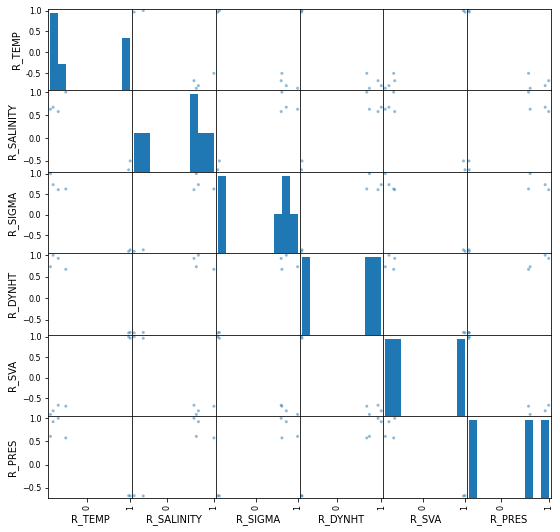

In [71]:
scatter_matrix(correlacoes, figsize=(9, 9)) #01

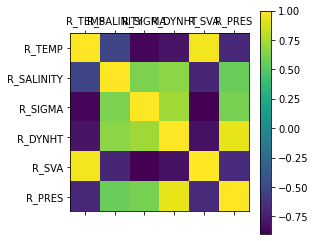

In [72]:
#02
plt.matshow(correlacoes)
plt.xticks(range(len(correlacoes.columns)), correlacoes.columns)
plt.yticks(range(len(correlacoes.columns)), correlacoes.columns)
plt.colorbar()
plt.show()

In [73]:
temperature = df_ocean['R_TEMP']
temperature

0         10.50
1         10.46
2         10.46
3         10.45
4         10.45
          ...  
864858    18.74
864859    18.74
864860    18.69
864861    18.16
864862    17.53
Name: R_TEMP, Length: 807121, dtype: float64

In [74]:
#01 salinidade
salinity = df_ocean['R_SALINITY']
salinity

0         33.440
1         33.440
2         33.437
3         33.420
4         33.421
           ...  
864858    33.408
864859    33.408
864860    33.415
864861    33.406
864862    33.388
Name: R_SALINITY, Length: 807121, dtype: float64

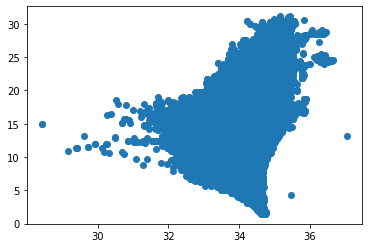

In [75]:
plt.scatter(salinity, temperature)
plt.show()

In [76]:
np.corrcoef(salinity, temperature)

array([[ 1.        , -0.50325314],
       [-0.50325314,  1.        ]])

In [77]:
# 2. SVA (anomalias)
sva = df_ocean['R_SVA']

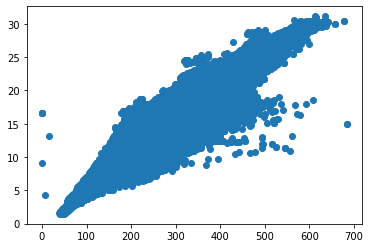

In [78]:
plt.scatter(sva, temperature)
plt.show()

In [79]:
np.corrcoef(sva, temperature)

array([[1.        , 0.96403296],
       [0.96403296, 1.        ]])

In [80]:
lm1 = linear_model.LinearRegression()
lm1.fit(sva[:, np.newaxis], temperature)
lm1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression()

In [81]:
x_prev = sva
y_prev = lm1.predict(x_prev[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [82]:
print("MSE: %.2f" % mean_squared_error(temperature, y_prev))#MSE Média dos erros quadrados
print("R2 : %.2f" % r2_score(temperature, y_prev)) #coeficiente de correlação

MSE: 1.25
R2 : 0.93


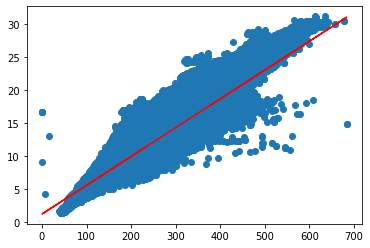

In [83]:
plt.scatter(sva, temperature)
plt.plot(x_prev, y_prev, color='red')

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
colunas = ['R_SALINITY', 'R_SVA']
df_ocean_x = pd.DataFrame(df_ocean, columns=colunas)

In [86]:
lm_pol = linear_model.LinearRegression()

In [87]:
#erro
#lm_pol.fit(sva, temperature) não funciona pois o polinomio precisa ser um array de 2 dimensões
poli = PolynomialFeatures(2)
poli_x = poli.fit_transform(df_ocean_x)

In [88]:
lm_pol.fit(poli_x, temperature)

LinearRegression()

In [89]:
y_prev = lm_pol.predict(poli_x)

In [90]:
print("MSE: %.3f" % mean_squared_error(temperature, y_prev))
print("R2: %.3f" % r2_score(temperature, y_prev))

MSE: 0.036
R2: 0.998


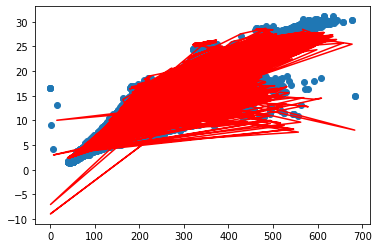

In [91]:
plt.scatter(sva, temperature)
plt.plot(x_prev, y_prev, color='red')